In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, roc_curve,confusion_matrix,precision_score
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
columns = pd.DataFrame({"":'','Columns':df.columns})
columns.set_index("",inplace=True)
columns

,Columns
,
,age
,sex
,cp
,trestbps
,chol
,fbs
,restecg
,thalach
,exang


In [4]:
info = pd.DataFrame({
    "Column Name": df.columns,
    "Non-Null Count": df.count().values,  
    "Data Type": df.dtypes.values
})
info

,Column Name,Non-Null Count,Data Type
0,age,1025,int64
1,sex,1025,int64
2,cp,1025,int64
3,trestbps,1025,int64
4,chol,1025,int64
5,fbs,1025,int64
6,restecg,1025,int64
7,thalach,1025,int64
8,exang,1025,int64
9,oldpeak,1025,float64


In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [6]:
s_df = df.copy()
s_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [7]:
s_df['sex'] = s_df['sex'].map({1:'male',0:'female'})
s_df['cp'] = s_df['cp'].map({0:'Typical angina',1:'Atypical angina',2:'Non-anginal pain',3:'Asymptomatic'})

In [8]:
s_df['fbs'] = s_df['fbs'].map({1:'yes',0:'No'})
s_df['restecg'] = s_df['restecg'].map({0:"Normal",1:"wave abnormality",2:"Left ventricular hypertrophy"})
s_df['exang'] = s_df['exang'].map({1:'yes',0:'No'})
s_df['slope'] = s_df['slope'].map({0:"Downsloping",1:"Flat",2:"Upsloping"})
s_df['ca'] = s_df['ca'].map({0:"0 vessels blocked",1:"1 vessels blocked",2:"2 vessels blocked",3:"3 vessels blocked",4:"4 vessels blocked"})
s_df['thal'] = s_df['thal'].map({0:"Missing data",1:"Fixed blockage",2:"Normal heart",3:"Temporary blockage"})
s_df['target'] = s_df['target'].map({1:'Heart disease',0:"No heart disease"})

In [ ]:
df['thal'].unique()

In [ ]:
df['restecg'].unique()

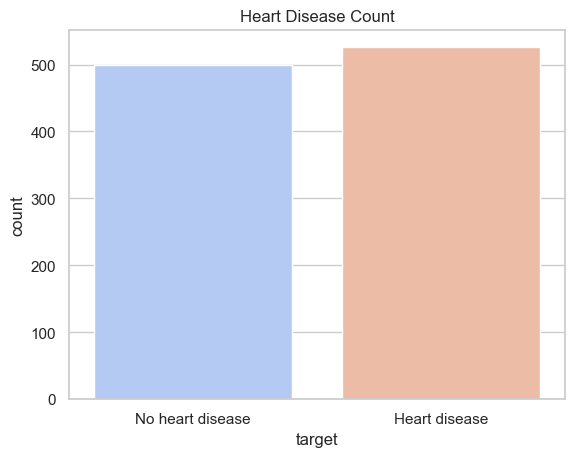

In [30]:
sns.countplot(x="target",data=s_df,palette='coolwarm')
plt.title("Heart Disease Count")
plt.show()

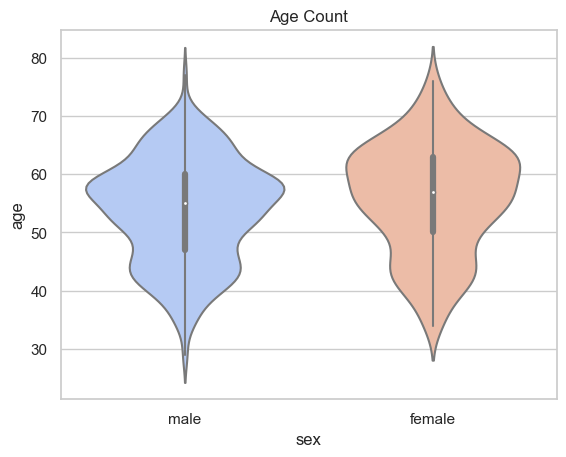

In [31]:
sns.violinplot(y='age',x='sex',data=s_df,palette='coolwarm')
plt.title('Age Count')
plt.show()

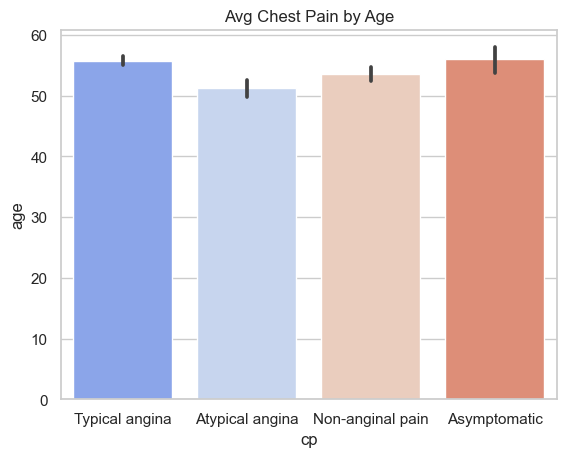

In [32]:
sns.barplot(x='cp',y='age',data=s_df,palette='coolwarm')
plt.title('Avg Chest Pain by Age')
plt.show()

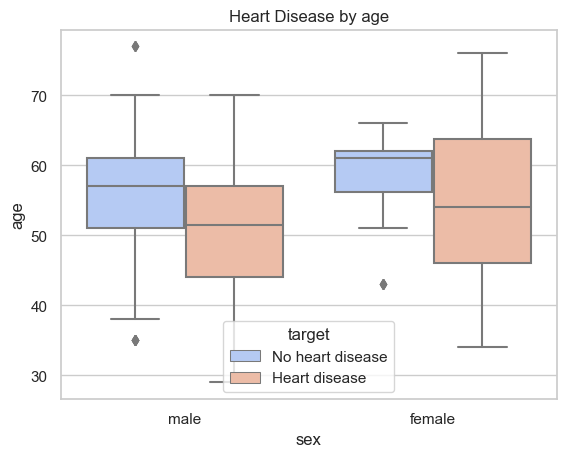

In [33]:
sns.boxplot(x='sex',y='age',hue="target",data=s_df,palette='coolwarm')
plt.title('Heart Disease by age')
plt.show()

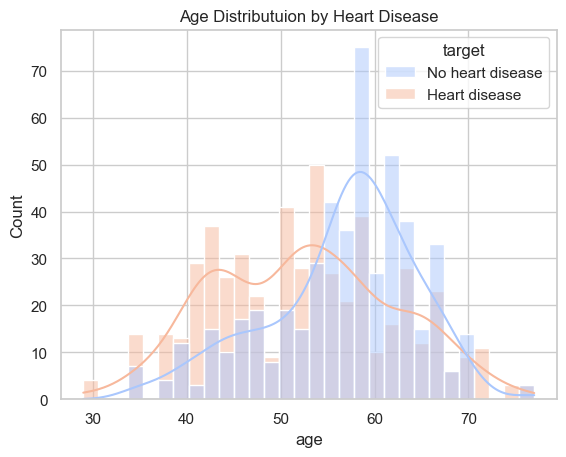

In [34]:
sns.histplot(data=s_df, x='age', hue='target', kde=True, bins=30,palette='coolwarm')
plt.title("Age Distributuion by Heart Disease")
plt.show()

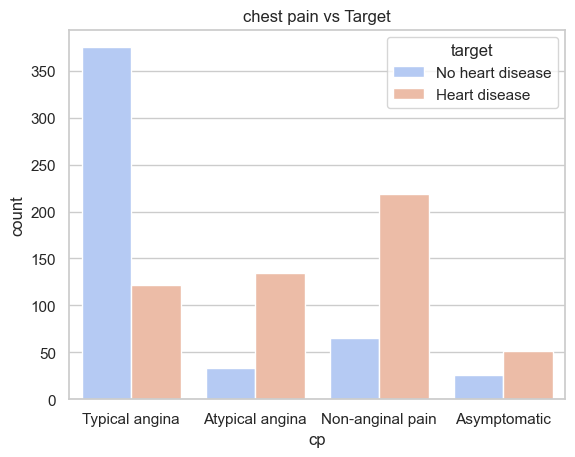

In [35]:
sns.countplot(x ='cp',hue='target',data=s_df,palette='coolwarm')
plt.title("chest pain vs Target")
plt.show()

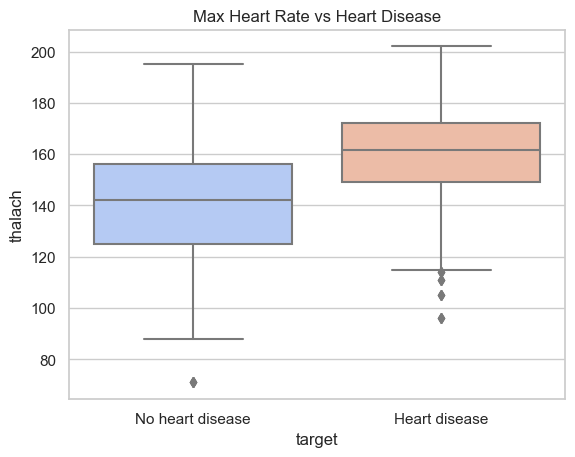

In [36]:
sns.boxplot(x='target', y='thalach', data=s_df, palette='coolwarm')
plt.title('Max Heart Rate vs Heart Disease')
plt.show()

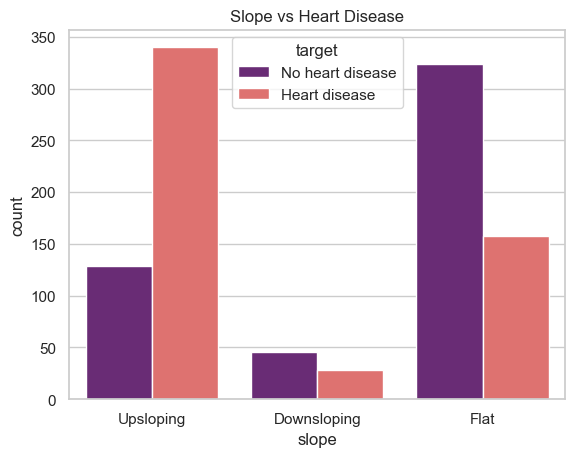

In [37]:
sns.countplot(x='slope', hue='target', data=s_df, palette='magma')
plt.title('Slope vs Heart Disease')
plt.show()

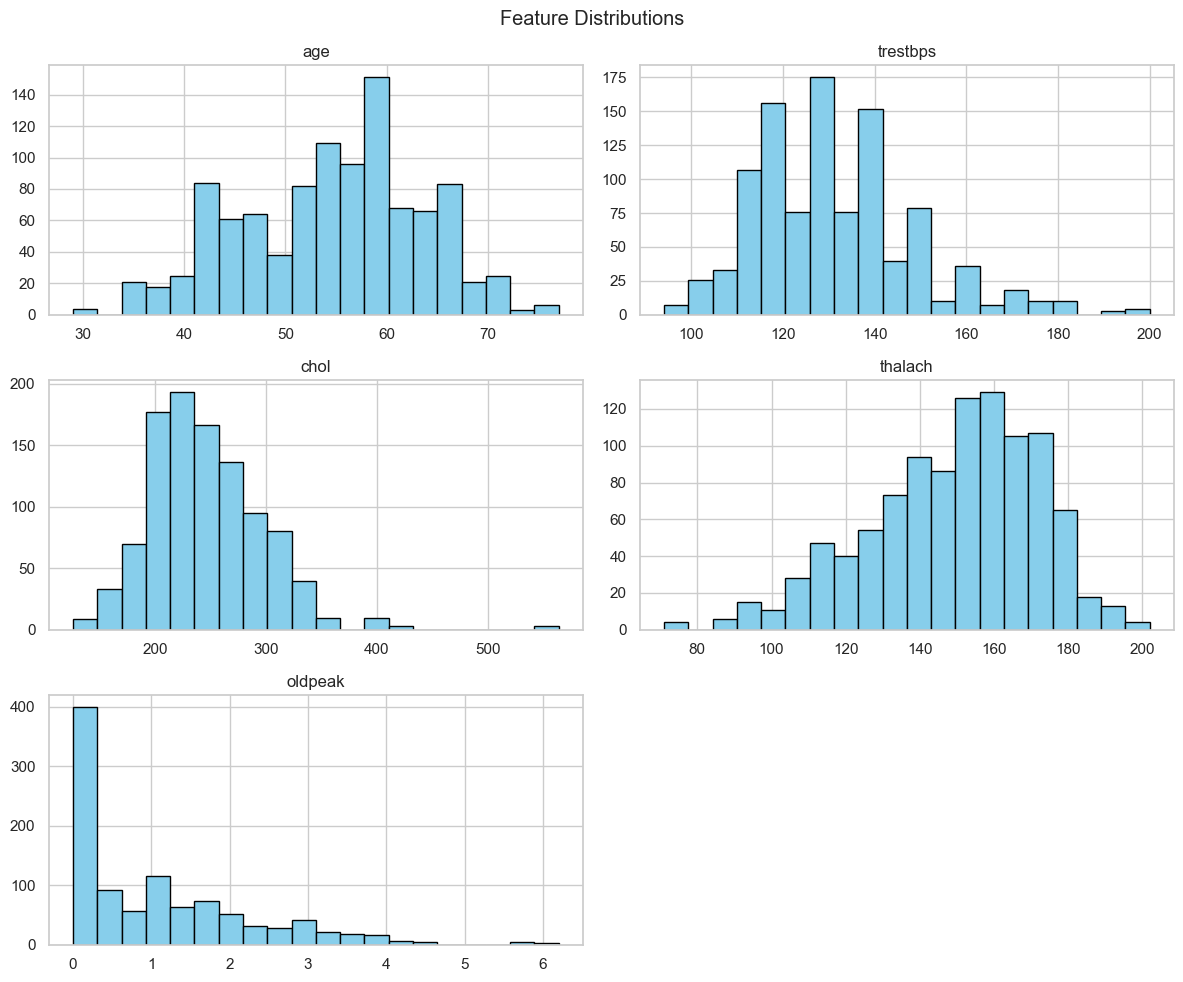

In [39]:
s_df.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions')
plt.tight_layout()
plt.show()


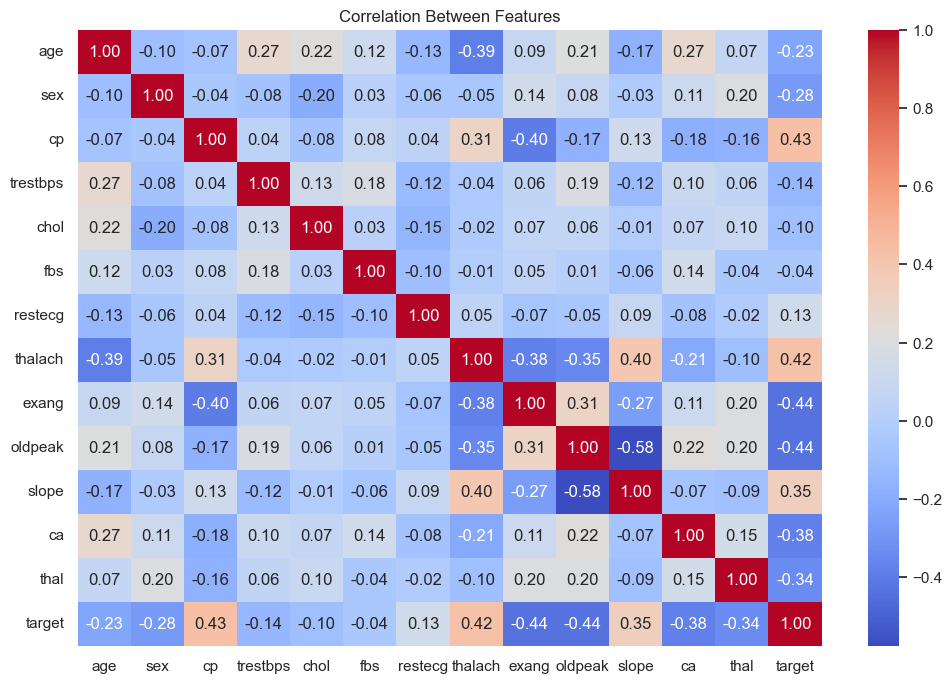

In [43]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Features")
plt.show()


In [9]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [10]:
s_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,male,Typical angina,125,212,No,wave abnormality,168,No,1.0,Upsloping,2 vessels blocked,Temporary blockage,No heart disease
1,53,male,Typical angina,140,203,yes,Normal,155,yes,3.1,Downsloping,0 vessels blocked,Temporary blockage,No heart disease
2,70,male,Typical angina,145,174,No,wave abnormality,125,yes,2.6,Downsloping,0 vessels blocked,Temporary blockage,No heart disease
3,61,male,Typical angina,148,203,No,wave abnormality,161,No,0.0,Upsloping,1 vessels blocked,Temporary blockage,No heart disease
4,62,female,Typical angina,138,294,yes,wave abnormality,106,No,1.9,Flat,3 vessels blocked,Normal heart,No heart disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,male,Atypical angina,140,221,No,wave abnormality,164,yes,0.0,Upsloping,0 vessels blocked,Normal heart,Heart disease
1021,60,male,Typical angina,125,258,No,Normal,141,yes,2.8,Flat,1 vessels blocked,Temporary blockage,No heart disease
1022,47,male,Typical angina,110,275,No,Normal,118,yes,1.0,Flat,1 vessels blocked,Normal heart,No heart disease
1023,50,female,Typical angina,110,254,No,Normal,159,No,0.0,Upsloping,0 vessels blocked,Normal heart,Heart disease


In [45]:
X = df.drop(columns="target",axis=1)
Y = df['target']

In [47]:
scaler = StandardScaler()
X_scaling = scaler.fit_transform(X)

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaling, Y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)     
X_test_scaled = scaler.transform(X_test)

In [70]:
model = SVC(probability=True)
model.fit(X_train_scaled, Y_train)


SVC(probability=True)

In [71]:
X_pred = model.predict(X_train_scaled)
X_pred

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,

In [72]:
Y_pred = model.predict(X_test_scaled)
Y_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [77]:
Y_proba = model.predict_proba(X_test_scaled)[:, 1]
Y_proba

array([9.92637683e-01, 9.19774839e-01, 1.09502267e-03, 9.96923543e-01,
       6.14367824e-02, 9.38102021e-01, 5.60168089e-02, 3.15906011e-03,
       9.65854518e-01, 3.81993973e-02, 9.74034393e-01, 2.43304700e-02,
       9.51648099e-01, 9.39333206e-01, 6.13767056e-02, 8.63344224e-01,
       3.42032985e-03, 9.90086064e-01, 9.38026847e-01, 7.28370747e-03,
       7.73524690e-01, 2.15554369e-02, 6.87302655e-01, 2.24704385e-03,
       7.73524690e-01, 9.38034763e-01, 9.87439546e-01, 9.38094853e-01,
       6.14109010e-02, 9.58258569e-01, 6.14422785e-02, 9.38162992e-01,
       2.33082143e-01, 9.19774839e-01, 9.71322298e-01, 8.57059032e-01,
       7.73524690e-01, 7.81899585e-01, 9.38111087e-01, 9.91428207e-01,
       3.15906011e-03, 2.42359399e-02, 8.35331471e-01, 6.87302655e-01,
       6.14689155e-02, 4.24884457e-02, 6.14393726e-02, 3.50717775e-01,
       2.94498232e-01, 3.99056885e-01, 6.76481662e-01, 9.04569363e-04,
       6.38567246e-01, 5.57057292e-02, 9.87439546e-01, 9.38111087e-01,
      

In [78]:
train_accuracy = accuracy_score(X_pred,Y_train)
train_accuracy

0.9548780487804878

In [79]:
test_accuracy = accuracy_score(Y_pred,Y_test)
test_accuracy

0.8878048780487805

In [91]:
# Accuracy
accuracy = accuracy_score(Y_test, Y_pred)

# Precision
precision = precision_score(Y_test, Y_pred)

# F1 Score
f1 = f1_score(Y_test, Y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "F1 Score"],
    "Value": [accuracy, precision, f1,]
})

metrics_df["Value"] = metrics_df["Value"].round(4)
metrics_df


,Metric,Value
0,Accuracy,0.8878
1,Precision,0.8509
2,F1 Score,0.8940


In [92]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88       102
           1       0.85      0.94      0.89       103

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



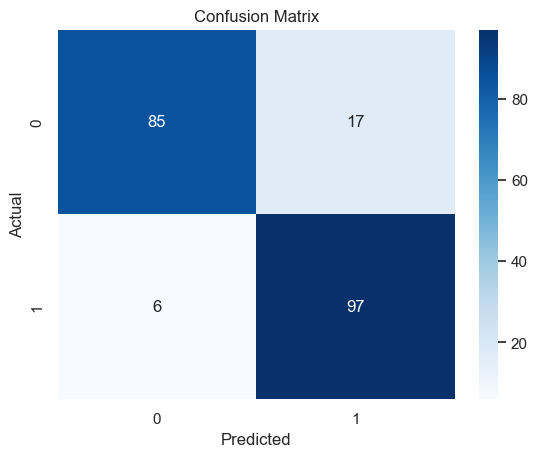

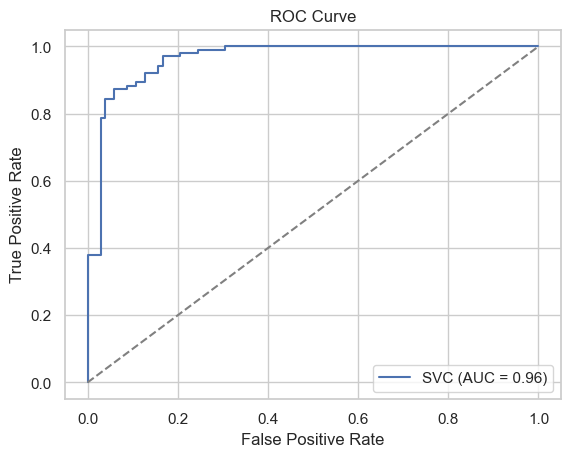

In [85]:
# Print metrics

# Confusion Matrix
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_proba)
plt.plot(fpr, tpr, label='SVC (AUC = {:.2f})'.format(roc_auc_score(Y_test, Y_proba)))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
